<a href="https://colab.research.google.com/github/Victoredus/Ciencia-de-datos/blob/main/modulo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tuned hpyerparameters:(best parameters) {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy: 0.8464285714285713
Test Accuracy: 0.8333333333333334


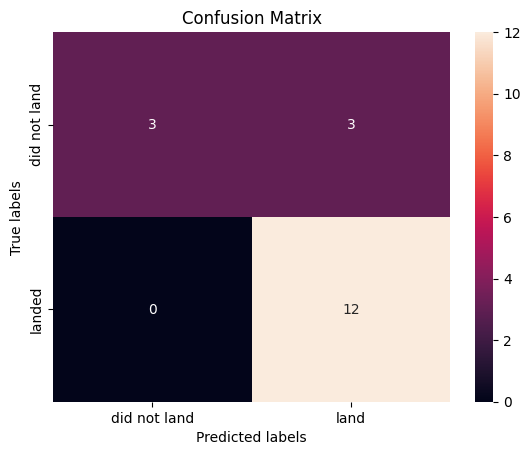

tuned hpyerparameters:(best parameters) {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy: 0.8482142857142856
Test Accuracy: 0.8333333333333334


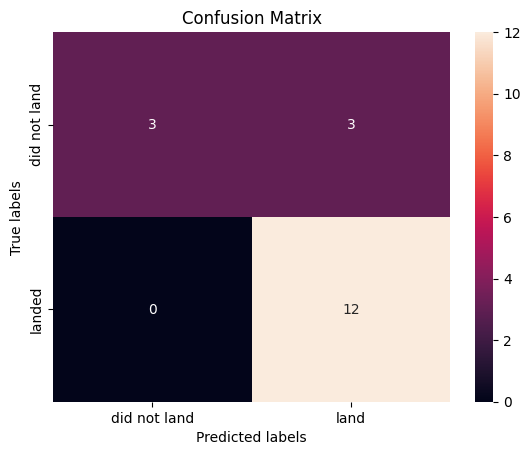

tuned hpyerparameters:(best parameters) {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy: 0.8625
Test Accuracy: 0.8333333333333334


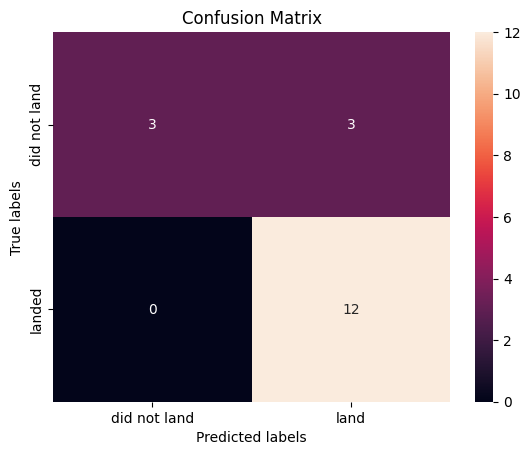

tuned hpyerparameters:(best parameters) {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy: 0.8482142857142858
Test Accuracy: 0.8333333333333334


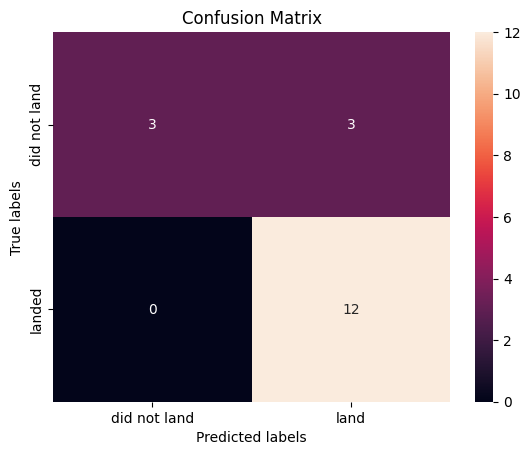

In [ ]:
!pip install numpy pandas seaborn scikit-learn matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y,y_predict):
    cm=confusion_matrix(y,y_predict)
    ax=plt.subplot()
    sns.heatmap(cm,annot=True,ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land','land'])
    ax.yaxis.set_ticklabels(['did not land','landed'])
    plt.show()
data=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv')
X=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
Y=data['Class'].to_numpy()
transform=preprocessing.StandardScaler()
X=transform.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
parameters={'C':[0.01,0.1,1],'penalty':['l2'],'solver':['lbfgs']}
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr,parameters,cv=10)
logreg_cv.fit(X_train,Y_train)
print("tuned hpyerparameters:(best parameters)",logreg_cv.best_params_)
print("accuracy:",logreg_cv.best_score_)
print("Test Accuracy:",logreg_cv.score(X_test,Y_test))
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
parameters={'kernel':('linear','rbf','poly','sigmoid'),'C':np.logspace(-3,3,5),'gamma':np.logspace(-3,3,5)}
svm=SVC()
svm_cv=GridSearchCV(svm,parameters,cv=10)
svm_cv.fit(X_train,Y_train)
print("tuned hpyerparameters:(best parameters)",svm_cv.best_params_)
print("accuracy:",svm_cv.best_score_)
print("Test Accuracy:",svm_cv.score(X_test,Y_test))
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
parameters={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[2*n for n in range(1,10)],'max_features':['auto','sqrt'],'min_samples_leaf':[1,2,4],'min_samples_split':[2,5,10]}
tree=DecisionTreeClassifier()
tree_cv=GridSearchCV(tree,parameters,cv=10)
tree_cv.fit(X_train,Y_train)
print("tuned hpyerparameters:(best parameters)",tree_cv.best_params_)
print("accuracy:",tree_cv.best_score_)
print("Test Accuracy:",tree_cv.score(X_test,Y_test))
yhat=tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
parameters={'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2]}
KNN=KNeighborsClassifier()
knn_cv=GridSearchCV(KNN,parameters,cv=10)
knn_cv.fit(X_train,Y_train)
print("tuned hpyerparameters:(best parameters)",knn_cv.best_params_)
print("accuracy:",knn_cv.best_score_)
print("Test Accuracy:",knn_cv.score(X_test,Y_test))
yhat=knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
print(svm_cv.best_params_)

{'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
